**Computational Models for Complex Systems Project - University of Pisa**

**Authors**: Giulia Ghisolfi

# Protein Synthesis Simulation
### Comparative Analysis of Models Utilizing Different Resources

The objective of these experiments is to evaluate how the model's performance, in terms of the number of synthesized proteins and execution times, varies with the number of available resources.

In order to understand whether the differences in performance are solely due to the random components of the model or actually to the different available resources, each experiment was conducted twice:

1. The first set of experiments was conducted without setting a seed for random variables.
2. The second set of experiments was conducted with a seed set for random components, ensuring that for all models, the random variables were set equally, and the input DNA sequences introduced into the cell for protein synthesis were the same and in the same order.

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


## Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

Load parameters:

In [3]:
import json

parameters_path_1 = 'data/parameters_ribosome.json'
parameters_1 = json.load(open(parameters_path_1, 'r'))

parameters_path_2 = 'data\parameters_rna_polymerases.json'
parameters_2 = json.load(open(parameters_path_2, 'r'))

In [4]:
from itertools import product

parameters_sets = list(product(*parameters_1.values())) + list(product(*parameters_2.values()))
TEST_NAME = 'models_comparison_'

Start simulations:

In [5]:
for i, set in enumerate(parameters_sets):
    ps = ProteinSinthesisProcess(data_df, *set[1:])

    print(f'Starting simulation of test set {i}')
    print(ps)
    ps.run(simulation_time=set[0]) # run the simulation

    ps.save_process(folder_test_name=TEST_NAME+f'{i}') # save the process
    
    # save the parameters
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'w') as f:
        json.dump({k: v for k, v in zip(parameters_1.keys(), set)}, f)
    
    print(f'Finished test: {i+1}/{len(parameters_sets)}\n')

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 0
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
2 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 134 proteins synthesized from 48 DNA sequences.
Process saved.
Finished test: 1/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 1
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
10 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 1761 proteins synthesized from 183 DNA sequences.
Process saved.
Finished test: 2/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 2
Protein Sinthesis Process:
185310 dna sequenc

Start the simulation with the random seed set:

In [6]:
RANDOM_SEED = 42

for i, set in enumerate(parameters_sets):
    # set the random seed
    set = list(set)
    set[9] = RANDOM_SEED
    
    ps = ProteinSinthesisProcess(data_df, *set[1:])

    print(f'Starting simulation of test set {i}')
    print(ps)
    ps.run(simulation_time=set[0]) # run the simulation

    ps.save_process(folder_test_name=TEST_NAME+'seed_'+f'{i}') # save the process
    
    # save the parameters
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'w') as f:
        json.dump({k: v for k, v in zip(parameters_1.keys(), set)}, f)
    
    print(f'Finished test: {i+1}/{len(parameters_sets)}\n')

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 0
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
2 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 141 proteins synthesized from 49 DNA sequences.
Process saved.
Finished test: 1/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 1
Protein Sinthesis Process:
185310 dna sequences to synthesize,
100 resources available,
100 RNA polymerases,
10 ribosomes,
50000.0 uracil bases,
50000.0 adenine bases,
50000.0 guanine bases,
50000.0 cytosine bases.
Simulation started
End simulation: 1937 proteins synthesized from 214 DNA sequences.
Process saved.
Finished test: 2/6

Simulation environment initialized, time unit: 0.0001 second.
Starting simulation of test set 2
Protein Sinthesis Process:
185310 dna sequenc

## Results

In [7]:
from src.utils.plot_utils import *
import pandas as pd

Load the results of the simulations:

In [8]:
results_df_list, results_df_list_seed = [], []
rna_polymerase_dict_list, rna_polymerase_dict_list_seed = [], []
ribosome_dict_list, ribosome_dict_list_seed = [], []
parameters_dict_list = []

for i in range(len(parameters_sets)):
    results_df = pd.read_csv(f'results/'+TEST_NAME+f'{i}/results.csv', index_col=0)
    results_df_list.append(results_df)

    results_df = pd.read_csv(f'results/'+TEST_NAME+'seed_'+f'{i}/results.csv', index_col=0)
    results_df_list_seed.append(results_df)

    with open(f'results/'+TEST_NAME+f'{i}/rna_polymerase_history.json', 'r') as f:
        rna_polymerase_dict_list.append(json.load(f))
    with open(f'results/'+TEST_NAME+'seed_'+f'{i}/rna_polymerase_history.json', 'r') as f:
        rna_polymerase_dict_list_seed.append(json.load(f))

    with open(f'results/'+TEST_NAME+f'{i}/ribosome_history.json', 'r') as f:
        ribosome_dict_list.append(json.load(f))
    with open(f'results/'+TEST_NAME+'seed_'+f'{i}/ribosome_history.json', 'r') as f:
        ribosome_dict_list_seed.append(json.load(f))
        
    with open(f'results/'+TEST_NAME+f'{i}/parameters.json', 'r') as f:
        parameters_dict_list.append(json.load(f))

Display model parameters:

In [9]:
display_model_parameters(parameters_dict_list)

Parameters shared by all models:
simulation_time: 3600
number_resources: 100
number_rna_transfers_per_codon: 1000
uracil_initial_amount: 50000.0
adenine_initial_amount: 50000.0
guanine_initial_amount: 50000.0
cytosine_initial_amount: 50000.0

Paramethers that differ between models:
   number_rna_polymerases  number_ribosomes
0                     100                 2
1                     100                10
2                     100               100
3                       2                50
4                      50                50
5                     100                50


### Number of Proteins

In [10]:
number_of_proteins_synthesized = pd.DataFrame(columns=[
    'number_rna_polymerases', 'number_ribosomes', 'number_of_proteins_synthesized', 'number_of_proteins_synthesized_seed'])
number_of_proteins_synthesized['number_rna_polymerases'] = [parameters_df['number_rna_polymerases'
    ] for parameters_df in parameters_dict_list]
number_of_proteins_synthesized['number_ribosomes'] = [parameters_df['number_ribosomes'
    ] for parameters_df in parameters_dict_list]
number_of_proteins_synthesized['number_of_proteins_synthesized'] = [results_df['number_of_proteins_synthesized'
    ].sum() for results_df in results_df_list]
number_of_proteins_synthesized['number_of_proteins_synthesized_seed'] = [results_df['number_of_proteins_synthesized'
    ].sum() for results_df in results_df_list_seed]
number_of_proteins_synthesized

,number_rna_polymerases,number_ribosomes,number_of_proteins_synthesized,number_of_proteins_synthesized_seed
0,100,2,134,141
1,100,10,1761,1937
2,100,100,6408,6163
3,2,50,700,742
4,50,50,6332,6521
5,100,50,6144,6129


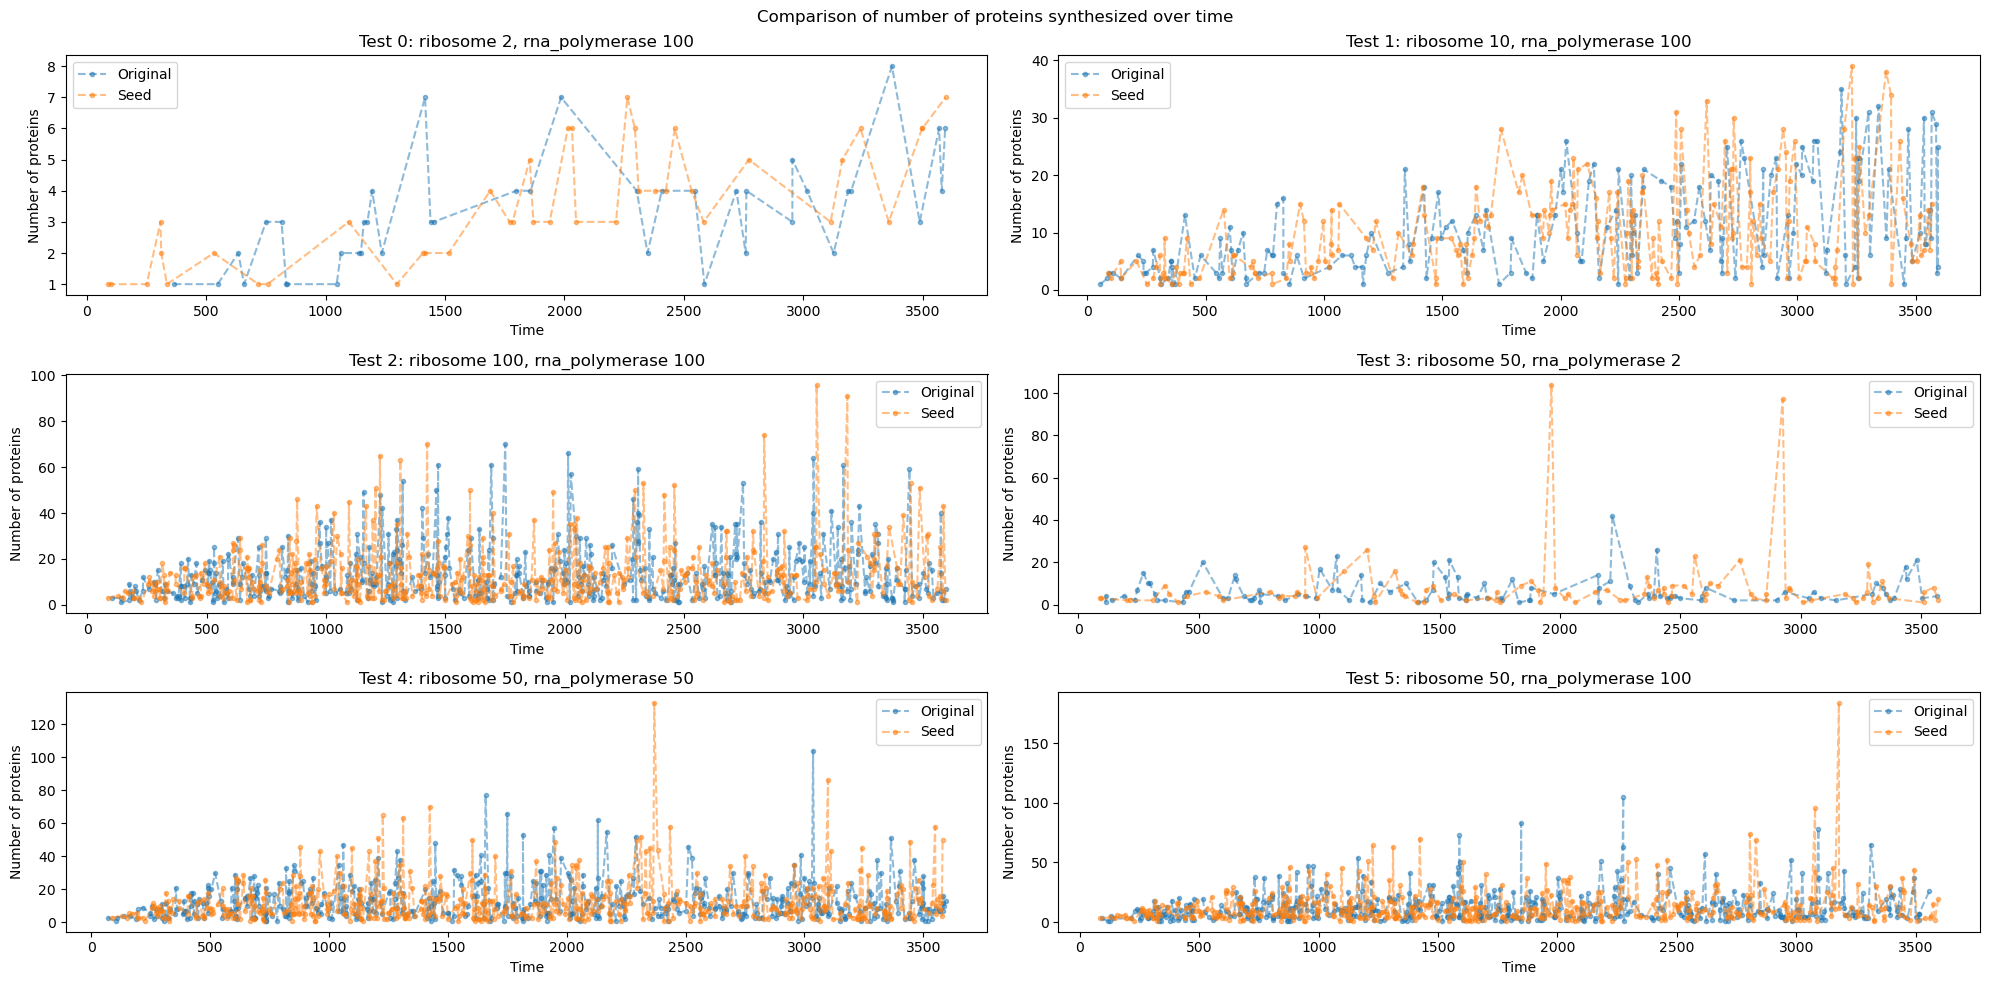

In [11]:
compare_proteins_number_over_time(results_df_list, results_df_list_seed, parameters_dict_list)

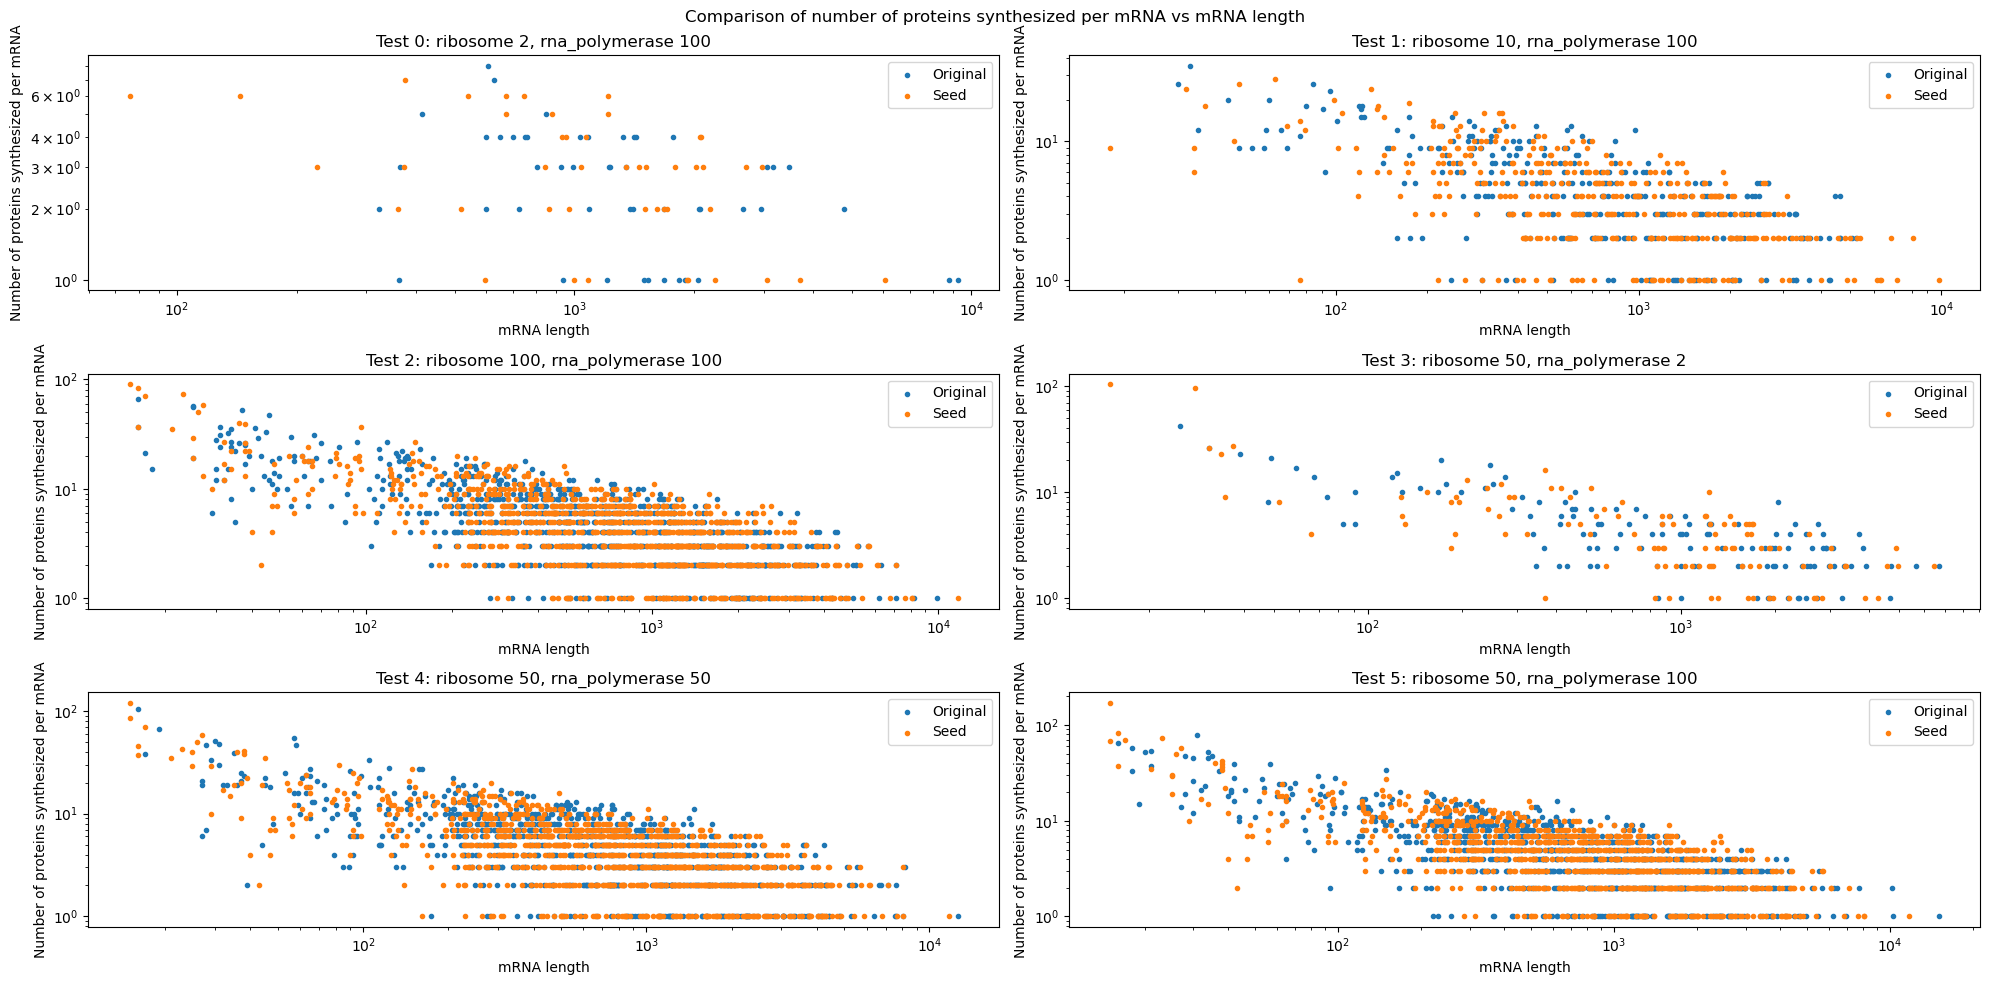

In [17]:
compare_number_proteins_per_length_mrna(results_df_list, results_df_list_seed, parameters_dict_list)

### Process time

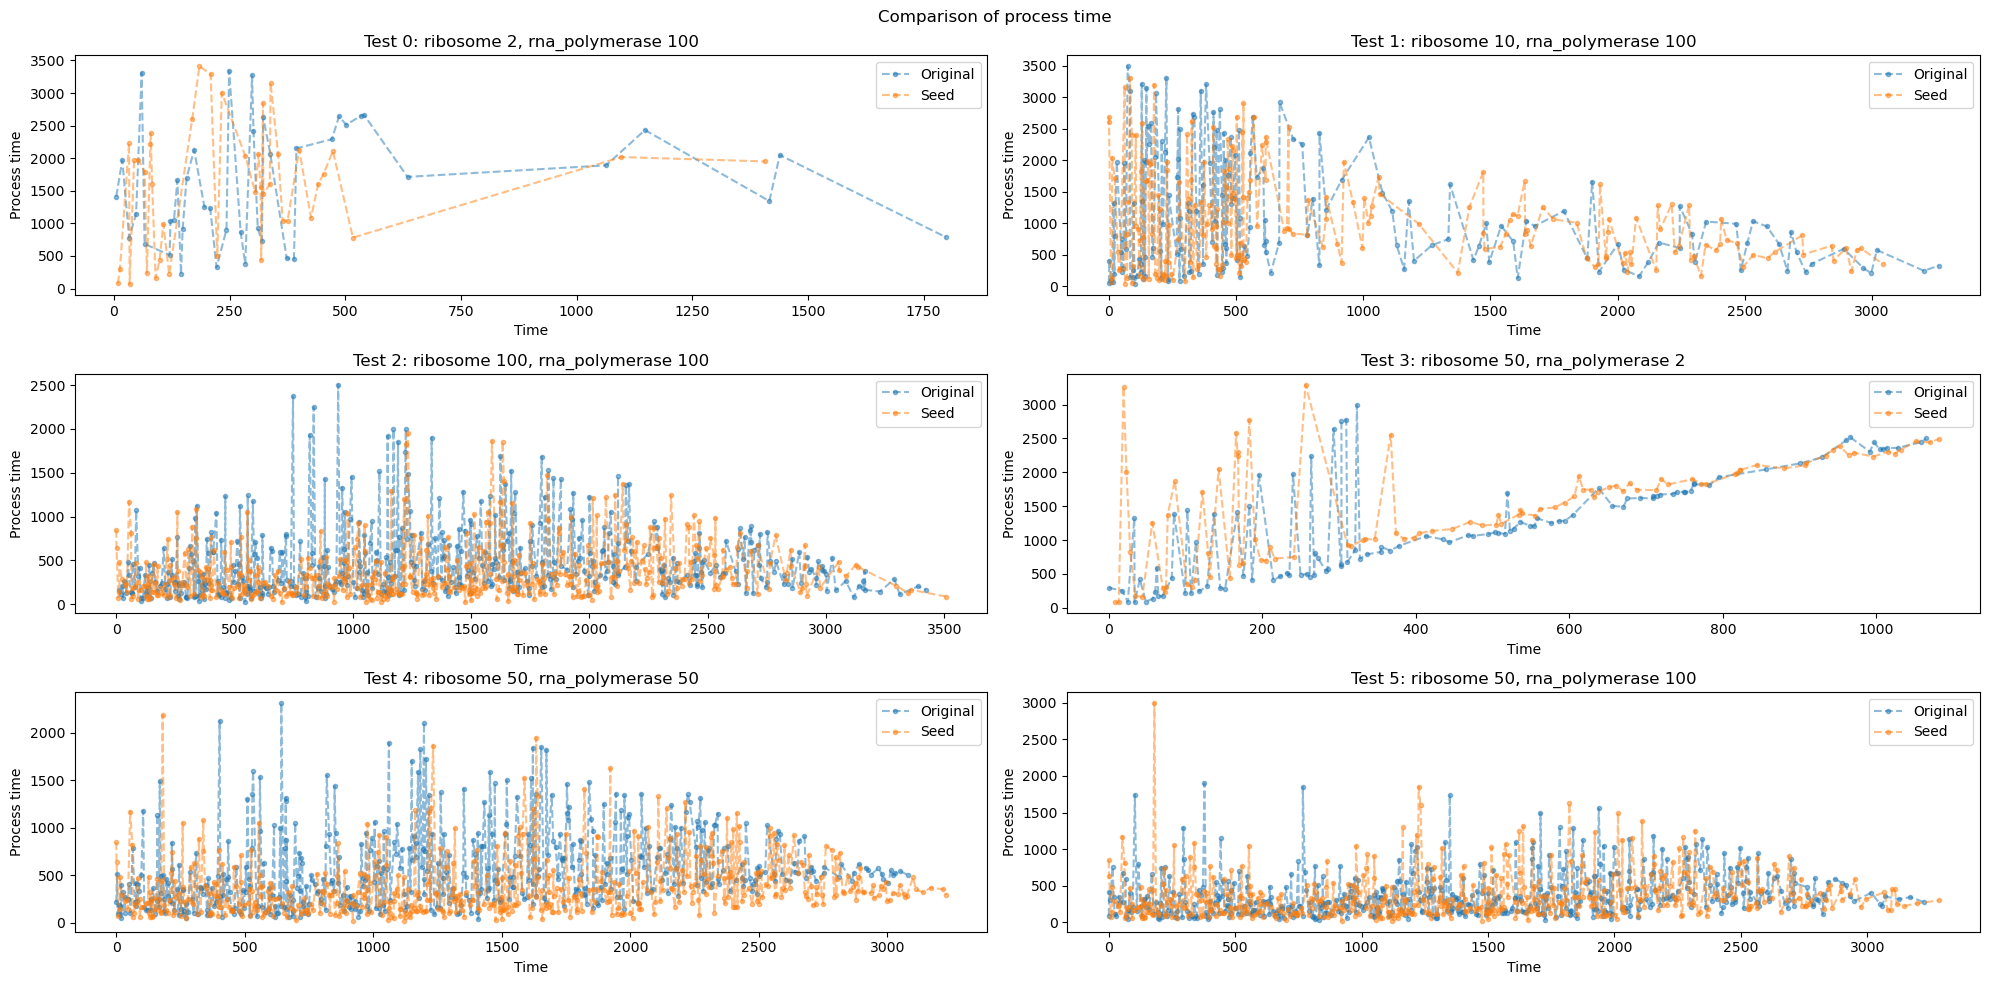

In [12]:
compare_process_time(results_df_list, results_df_list_seed, parameters_dict_list)

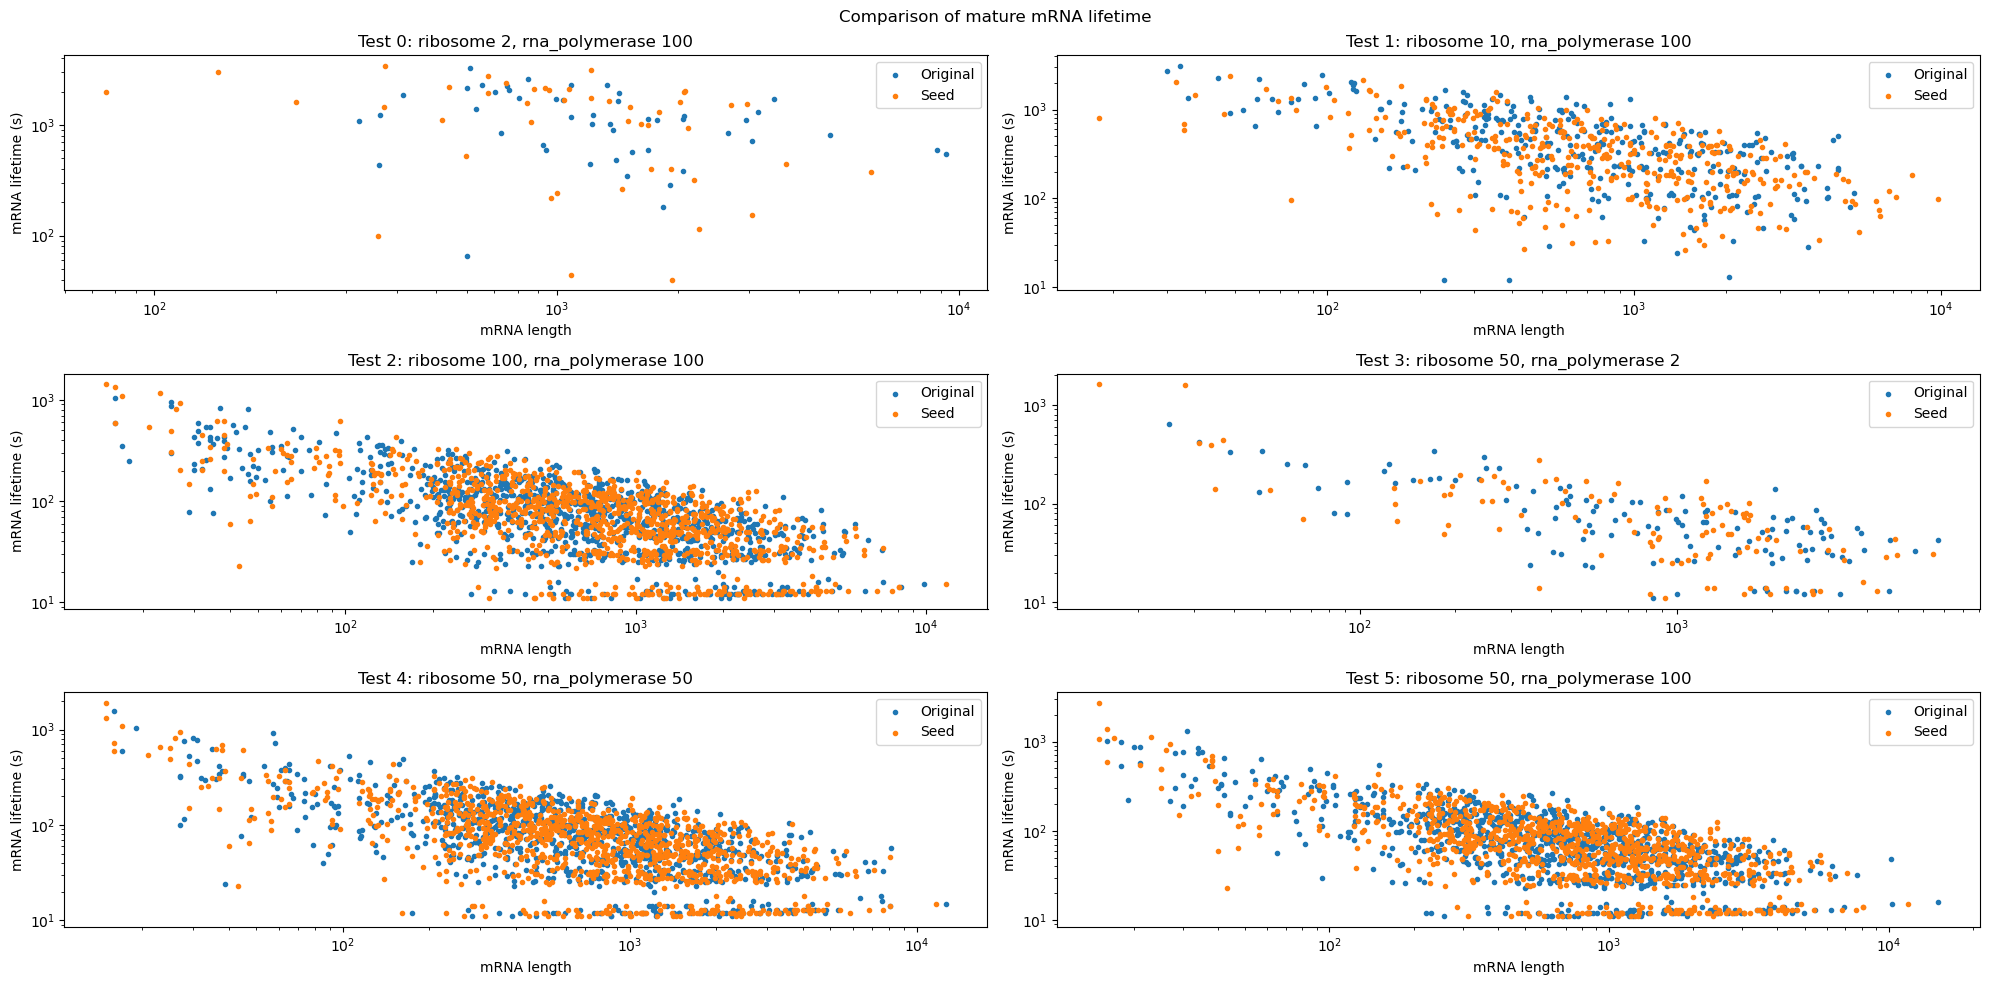

In [13]:
compare_mrna_lifetime(results_df_list, results_df_list_seed, parameters_dict_list)

### Resources waiting time

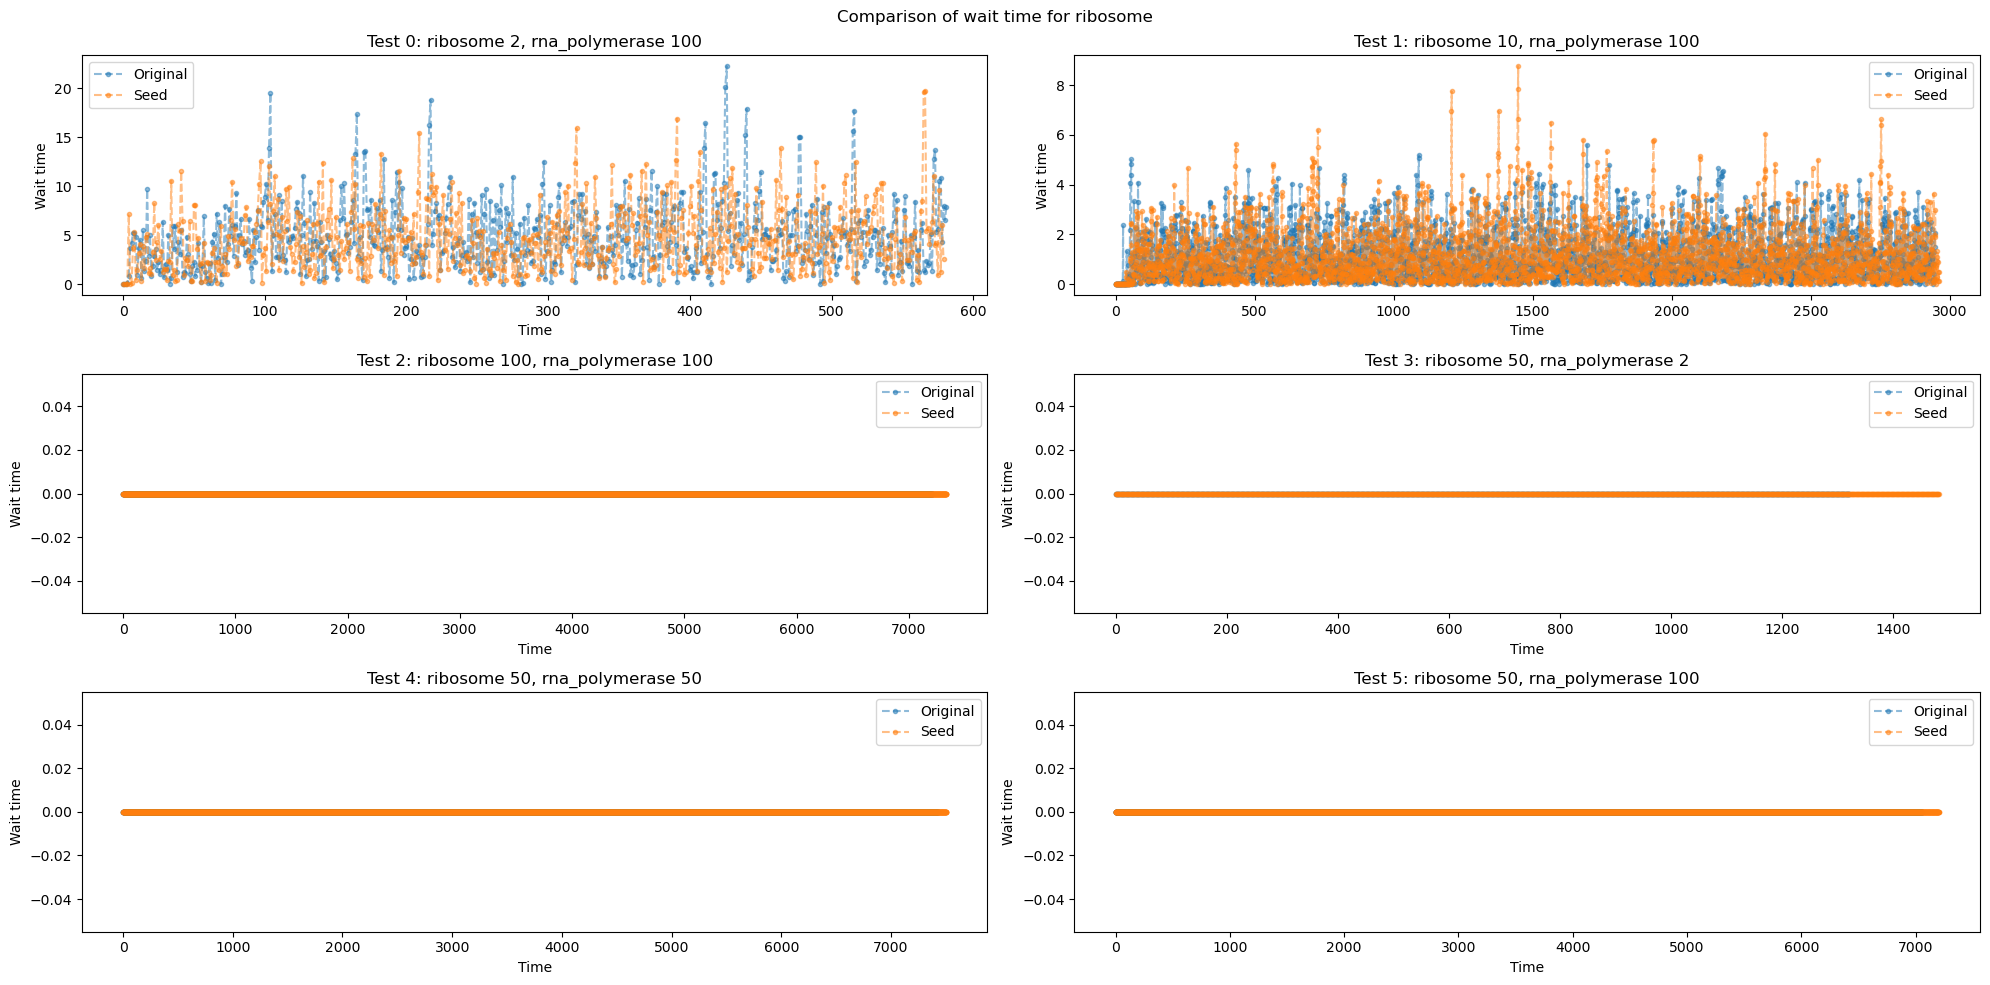

In [14]:
compare_wait_time(ribosome_dict_list, ribosome_dict_list_seed, parameters_dict_list, 'ribosome')

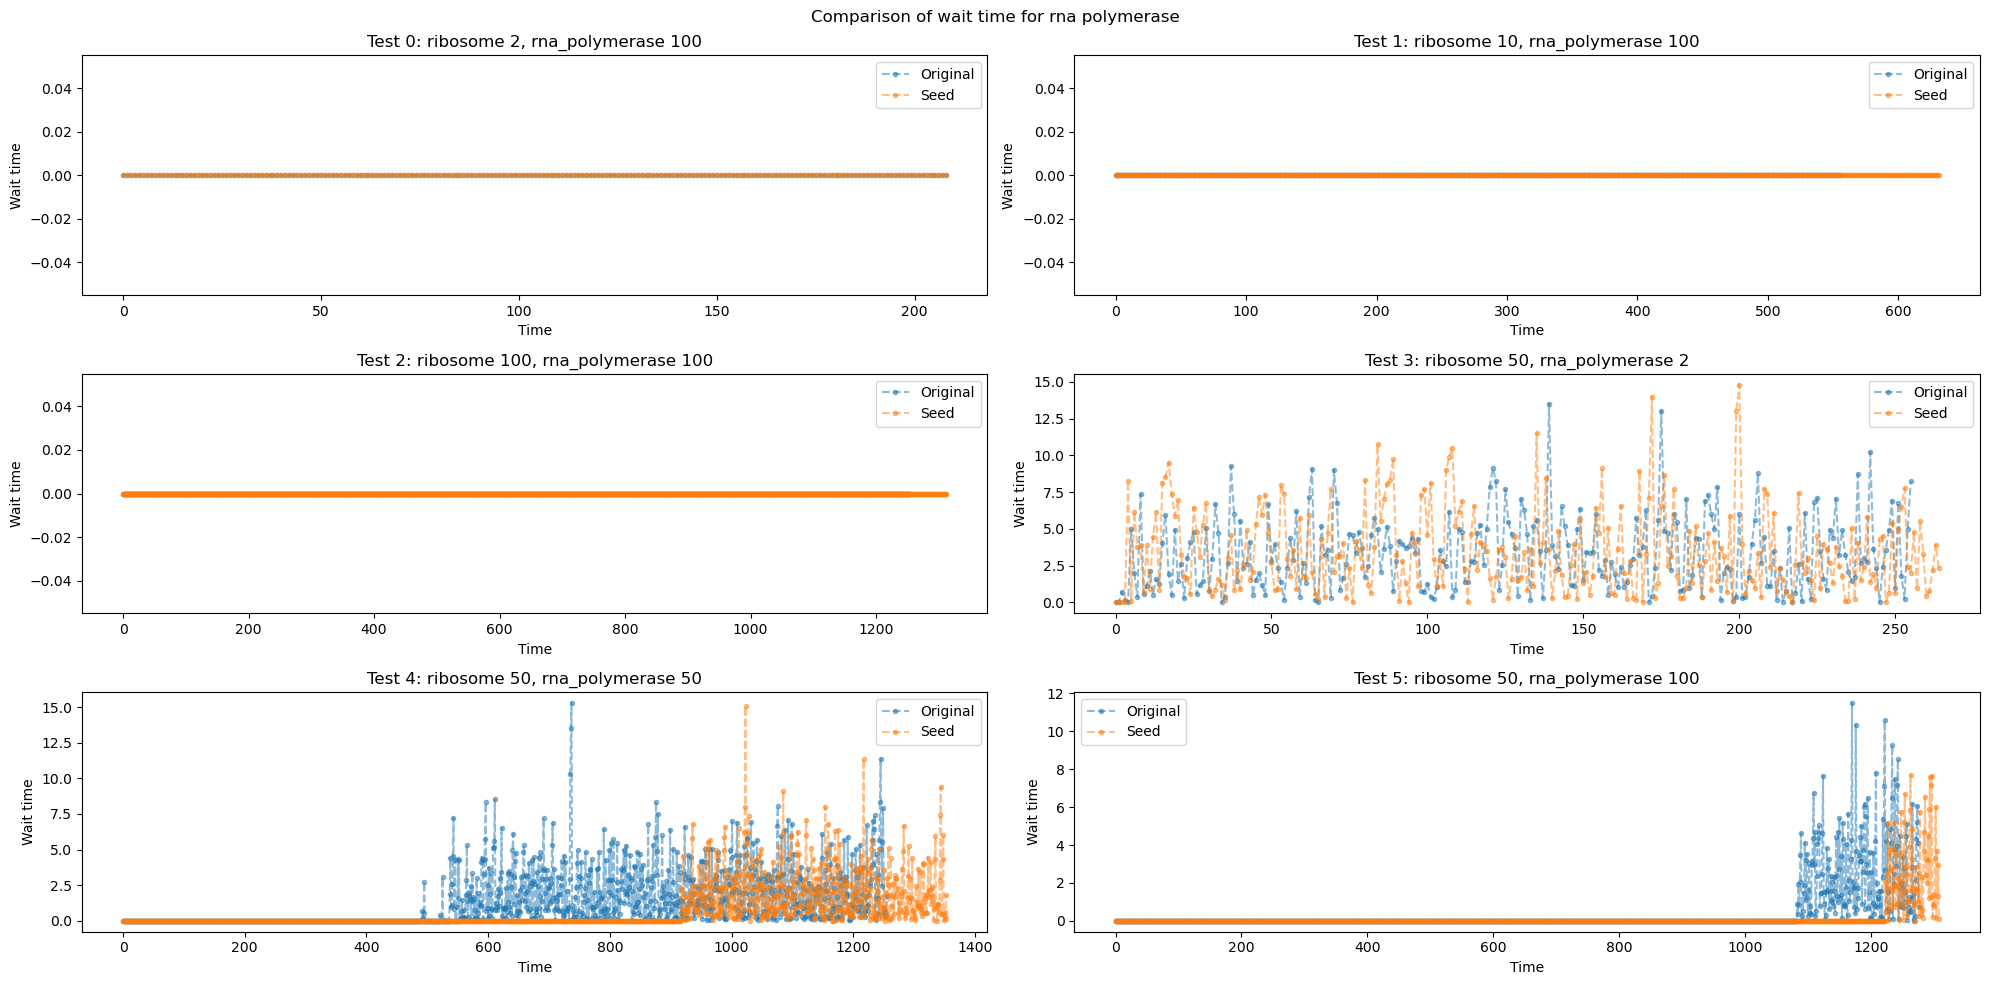

In [15]:
compare_wait_time(rna_polymerase_dict_list, rna_polymerase_dict_list_seed, parameters_dict_list, 'rna polymerase')